In [461]:
import pandas as pd
import numpy as np

In [462]:
label_dict = pd.read_csv("vocabulary.csv")

In [463]:
# read in video level data

vid_rgb=pd.read_pickle("data/logistic_video_rgb_raw.pkl")
vid_aud=pd.read_pickle("data/logistic_video_audio_raw.pkl")
vid_all=pd.read_pickle("logistic_video_both_raw.pkl")

In [464]:
# read in frame level data

fme_rgb=pd.read_pickle(" data/framelevel_mlp_rgb_raw.pkl")
fme_aud=pd.read_pickle("data/framelevel_mlp_audio_raw.pkl")
fme_all=pd.read_pickle("data/framelevel_all_raw.pkl")

In [465]:
# set number of labels to consider in agregate metrics
n_classes=50

In [466]:

# convert y_true and y_predproba to np arrays and get
#  first n_classes labels for metrics for all data


vid_rgb["y_true"]=vid_rgb.apply(lambda row: np.array(row["y_true"]), axis=1)
vid_rgb["y_true"]=vid_rgb.apply(lambda row: row["y_true"][0:n_classes], axis=1)
vid_rgb["y_predproba"]=vid_rgb.apply(lambda row: np.array(row["y_predproba"]), axis=1)
vid_rgb["y_predproba"]=vid_rgb.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)

vid_aud["y_true"]=vid_aud.apply(lambda row: np.array(row["y_true"]), axis=1)
vid_aud["y_true"]=vid_aud.apply(lambda row: row["y_true"][0:n_classes], axis=1)
vid_aud["y_predproba"]=vid_aud.apply(lambda row: np.array(row["y_predproba"]), axis=1)
vid_aud["y_predproba"]=vid_aud.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)

vid_all["y_true"]=vid_all.apply(lambda row: np.array(row["y_true"]), axis=1)
vid_all["y_true"]=vid_all.apply(lambda row: row["y_true"][0:n_classes], axis=1)
vid_all["y_predproba"]=vid_all.apply(lambda row: np.array(row["y_predproba"]), axis=1)
vid_all["y_predproba"]=vid_all.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)

fme_rgb["y_true"]=fme_rgb.apply(lambda row: np.array(row["y_true"]), axis=1)
fme_rgb["y_true"]=fme_rgb.apply(lambda row: row["y_true"][0:n_classes], axis=1)
fme_rgb["y_predproba"]=fme_rgb.apply(lambda row: np.array(row["y_predproba"]), axis=1)
fme_rgb["y_predproba"]=fme_rgb.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)

fme_aud["y_true"]=fme_aud.apply(lambda row: np.array(row["y_true"]), axis=1)
fme_aud["y_true"]=fme_aud.apply(lambda row: row["y_true"][0:n_classes], axis=1)
fme_aud["y_predproba"]=fme_aud.apply(lambda row: np.array(row["y_predproba"]), axis=1)
fme_aud["y_predproba"]=fme_aud.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)

fme_all["y_true"]=fme_all.apply(lambda row: np.array(row["y_true"]), axis=1)
fme_all["y_true"]=fme_all.apply(lambda row: row["y_true"][0:n_classes], axis=1)
fme_all["y_predproba"]=fme_all.apply(lambda row: np.array(row["y_predproba"]), axis=1)
fme_all["y_predproba"]=fme_all.apply(lambda row: row["y_predproba"][0:n_classes], axis=1)


In [467]:
# get plotting values for vid_rbg

from sklearn.metrics import roc_curve, auc

ytest_rgb=[]
for i in vid_rgb["y_true"]:
    ytest_rgb.extend(i)
ytest_rgb=np.array(ytest_rgb)


yscore_rgb=[]
for i in vid_rgb["y_predproba"]:
    yscore_rgb.extend(i)
yscore_rgb=np.array(yscore_rgb)

ytest_rgb=ytest_rgb.reshape(vid_rgb.shape[0],n_classes)
yscore_rgb=yscore_rgb.reshape(vid_rgb.shape[0],n_classes)

fpr_rgb = dict()
tpr_rgb = dict()
roc_auc_rgb = dict()
for i in range(n_classes):
    fpr_rgb[i], tpr_rgb[i], _ = roc_curve(ytest_rgb[:, i], yscore_rgb[:, i])
    roc_auc_rgb[i] = auc(fpr_rgb[i], tpr_rgb[i])
# Compute micro-average ROC curve and ROC area
fpr_rgb["micro"], tpr_rgb["micro"], _ = roc_curve(ytest_rgb.ravel(), yscore_rgb.ravel())
roc_auc_rgb["micro"] = auc(fpr_rgb["micro"], tpr_rgb["micro"])


# First aggregate all false positive rates
all_fpr_rgb = np.unique(np.concatenate([fpr_rgb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rgb = np.zeros_like(all_fpr_rgb)
for i in range(n_classes):
    mean_tpr_rgb += np.interp(all_fpr_rgb, fpr_rgb[i], tpr_rgb[i])

# Finally average it and compute AUC
mean_tpr_rgb /= n_classes

fpr_rgb["macro"] = all_fpr_rgb
tpr_rgb["macro"] = mean_tpr_rgb
roc_auc_rgb["macro"] = auc(fpr_rgb["macro"], tpr_rgb["macro"])


In [468]:
# get plotting values for vid_aud

ytest_aud=[]
for i in vid_aud["y_true"]:
    ytest_aud.extend(i)
ytest_aud=np.array(ytest_aud)


yscore_aud=[]
for i in vid_aud["y_predproba"]:
    yscore_aud.extend(i)
yscore_aud=np.array(yscore_aud)

ytest_aud=ytest_aud.reshape(vid_aud.shape[0],n_classes)
yscore_aud=yscore_aud.reshape(vid_aud.shape[0],n_classes)



fpr_aud = dict()
tpr_aud = dict()
roc_auc_aud = dict()
for i in range(n_classes):
    fpr_aud[i], tpr_aud[i], _ = roc_curve(ytest_aud[:, i], yscore_aud[:, i])
    roc_auc_aud[i] = auc(fpr_aud[i], tpr_aud[i])
# Compute micro-average ROC curve and ROC area
fpr_aud["micro"], tpr_aud["micro"], _ = roc_curve(ytest_aud.ravel(), yscore_aud.ravel())
roc_auc_aud["micro"] = auc(fpr_aud["micro"], tpr_aud["micro"])


# First aggregate all false positive rates
all_fpr_aud = np.unique(np.concatenate([fpr_aud[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_aud = np.zeros_like(all_fpr_aud)
for i in range(n_classes):
    mean_tpr_aud += np.interp(all_fpr_aud, fpr_aud[i], tpr_aud[i])

# Finally average it and compute AUC
mean_tpr_aud /= n_classes

fpr_aud["macro"] = all_fpr_aud
tpr_aud["macro"] = mean_tpr_aud
roc_auc_aud["macro"] = auc(fpr_aud["macro"], tpr_aud["macro"])


In [469]:
# get plotting values for vid_all

ytest_all=[]
for i in vid_all["y_true"]:
    ytest_all.extend(i)
ytest_all=np.array(ytest_all)


yscore_all=[]
for i in vid_all["y_predproba"]:
    yscore_all.extend(i)
yscore_all=np.array(yscore_all)

ytest_all=ytest_all.reshape(vid_all.shape[0],n_classes)
yscore_all=yscore_all.reshape(vid_all.shape[0],n_classes)



fpr_all = dict()
tpr_all = dict()
roc_auc_all = dict()
for i in range(n_classes):
    fpr_all[i], tpr_all[i], _ = roc_curve(ytest_all[:, i], yscore_all[:, i])
    roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])
# Compute micro-average ROC curve and ROC area
fpr_all["micro"], tpr_all["micro"], _ = roc_curve(ytest_all.ravel(), yscore_all.ravel())
roc_auc_all["micro"] = auc(fpr_all["micro"], tpr_all["micro"])


# First aggregate all false positive rates
all_fpr_all = np.unique(np.concatenate([fpr_all[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_all = np.zeros_like(all_fpr_all)
for i in range(n_classes):
    mean_tpr_all += np.interp(all_fpr_all, fpr_all[i], tpr_all[i])

# Finally average it and compute AUC
mean_tpr_all /= n_classes

fpr_all["macro"] = all_fpr_all
tpr_all["macro"] = mean_tpr_all
roc_auc_all["macro"] = auc(fpr_all["macro"], tpr_all["macro"])


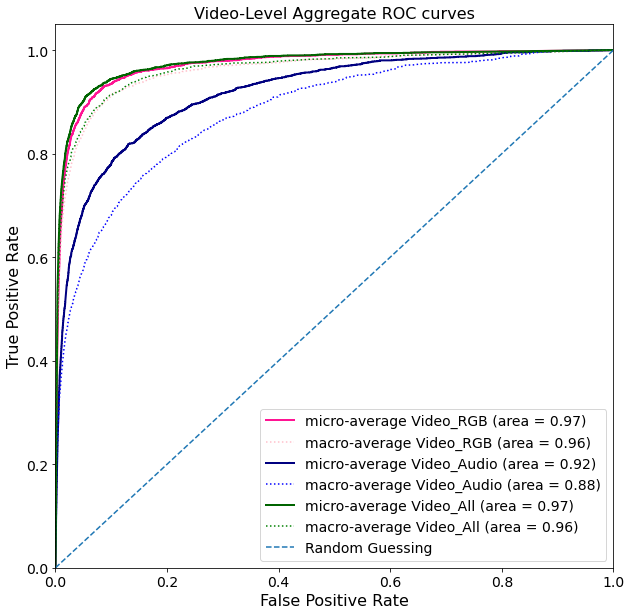

<Figure size 432x288 with 0 Axes>

In [470]:
import matplotlib.pyplot as plt

# Plot ROC curves for video-level data
plt.figure(figsize=(10,10))

SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc('font', family='Roboto')           # controls default font
plt.rc('font', weight='normal')              # controls default font
plt.rc('font', size=SIZE_DEFAULT)       # controls default text sizes
plt.rc('axes', titlesize=SIZE_LARGE)    # fontsize of the axes title
plt.rc('axes', labelsize=SIZE_LARGE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE_DEFAULT) # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE_DEFAULT)

#rgb-micro
plt.plot(
    fpr_rgb["micro"],
    tpr_rgb["micro"],
    label="micro-average Video_RGB (area = {0:0.2f})".format(roc_auc_rgb["micro"]),
    color="deeppink",
   # linestyle=":",
    linewidth=2

)

#rgb-macro
plt.plot(
    fpr_rgb["macro"],
    tpr_rgb["macro"],
    label="macro-average Video_RGB (area = {0:0.2f})".format(roc_auc_rgb["macro"]),
    color="pink",
    linestyle=":",

)

#aud-micro
plt.plot(
    fpr_aud["micro"],
    tpr_aud["micro"],
    label="micro-average Video_Audio (area = {0:0.2f})".format(roc_auc_aud["micro"]),
    color="navy",
    #linestyle="",
    linewidth=2

)

#aud-macro
plt.plot(
    fpr_aud["macro"],
    tpr_aud["macro"],
    label="macro-average Video_Audio (area = {0:0.2f})".format(roc_auc_aud["macro"]),
    color="blue",
    linestyle=":",
)

#all-micro
plt.plot(
    fpr_all["micro"],
    tpr_all["micro"],
    label="micro-average Video_All (area = {0:0.2f})".format(roc_auc_all["micro"]),
    color="darkgreen",
    #linestyle="",
    linewidth=2
)

#all-macro
plt.plot(
    fpr_all["macro"],
    tpr_all["macro"],
    label="macro-average Video_All (area = {0:0.2f})".format(roc_auc_all["macro"]),
    color="green",
    linestyle=":",
)




plt.plot([0, 1], [0, 1],label="Random Guessing",linestyle="dashed")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Video-Level Aggregate ROC curves")
plt.legend(loc="lower right")
plt.show()
plt.savefig('vid-level.png', dpi=300)


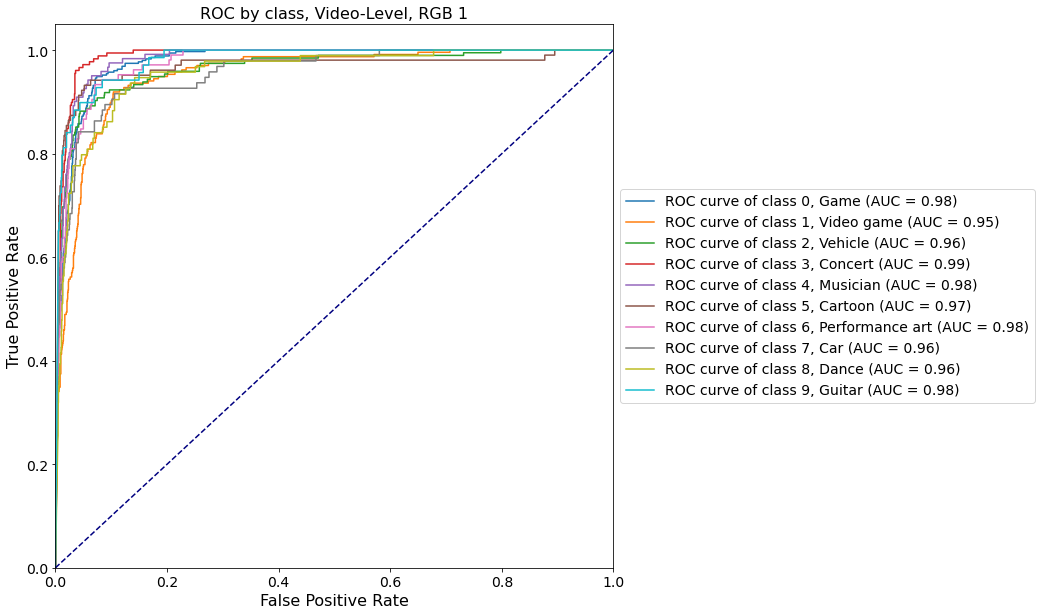

In [471]:
# get video-level roc curves by class

plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_rgb[i],
        tpr_rgb[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_rgb[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Video-Level, RGB 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

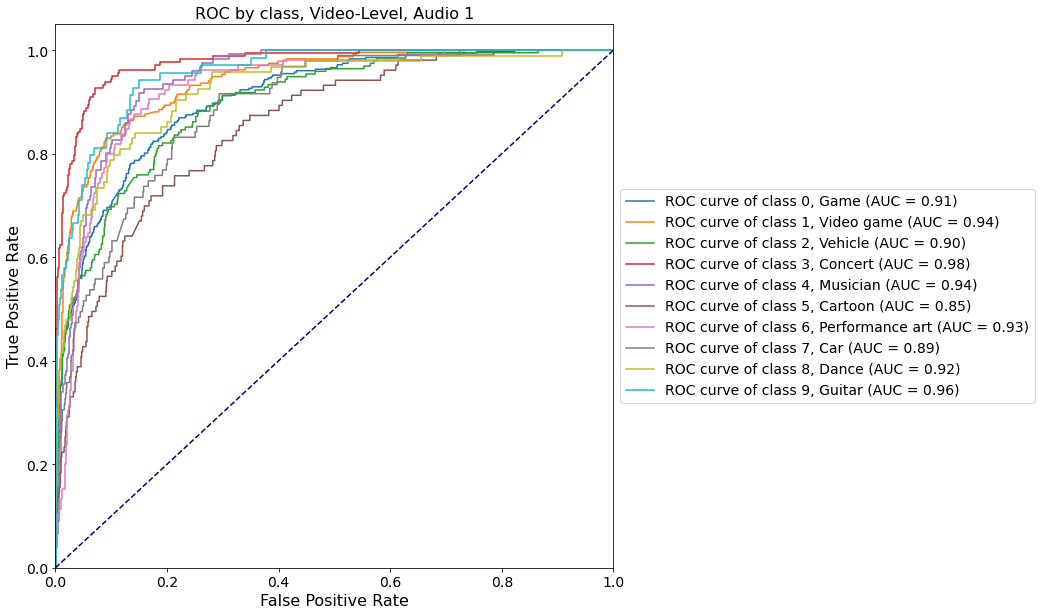

In [472]:
# get video-level roc curves by class

plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_aud[i],
        tpr_aud[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_aud[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Video-Level, Audio 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

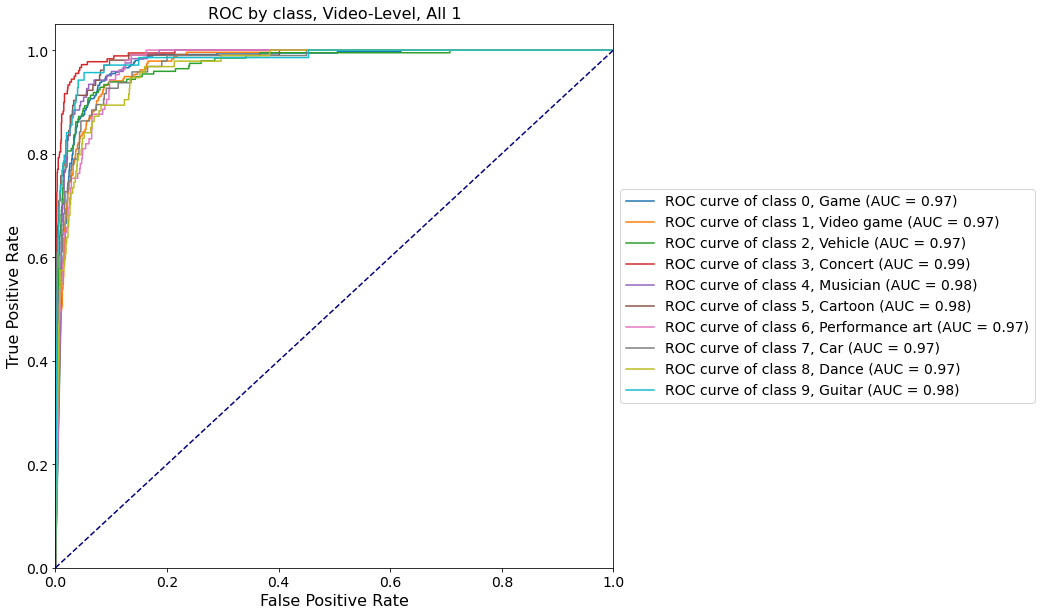

In [473]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_all[i],
        tpr_all[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_all[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Video-Level, All 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

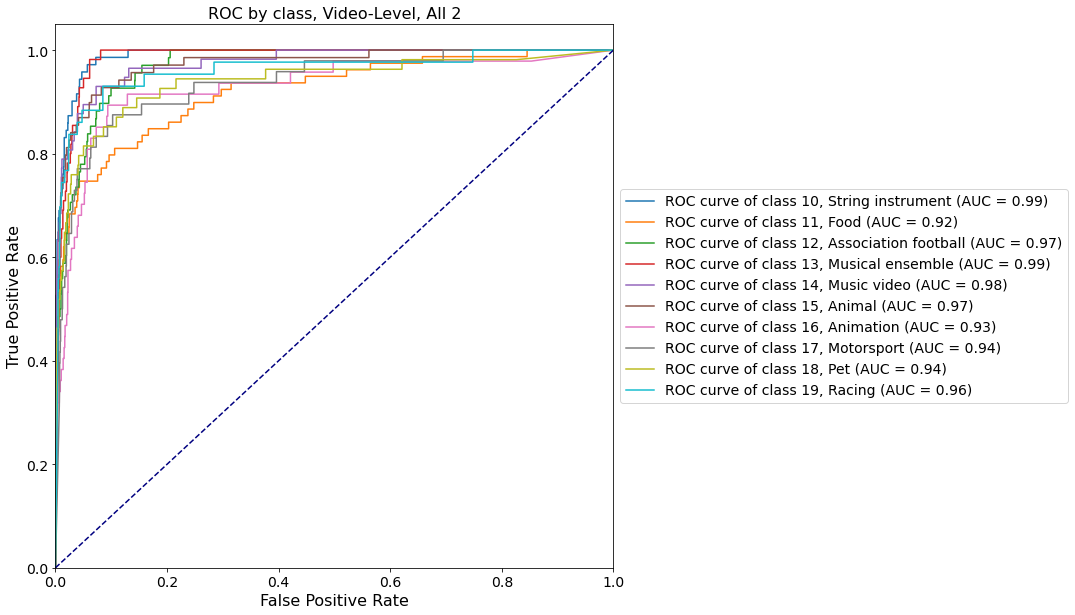

In [474]:
plt.figure(figsize=(10,10))

for i in range(10,20):
    plt.plot(
        fpr_all[i],
        tpr_all[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_all[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Video-Level, All 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

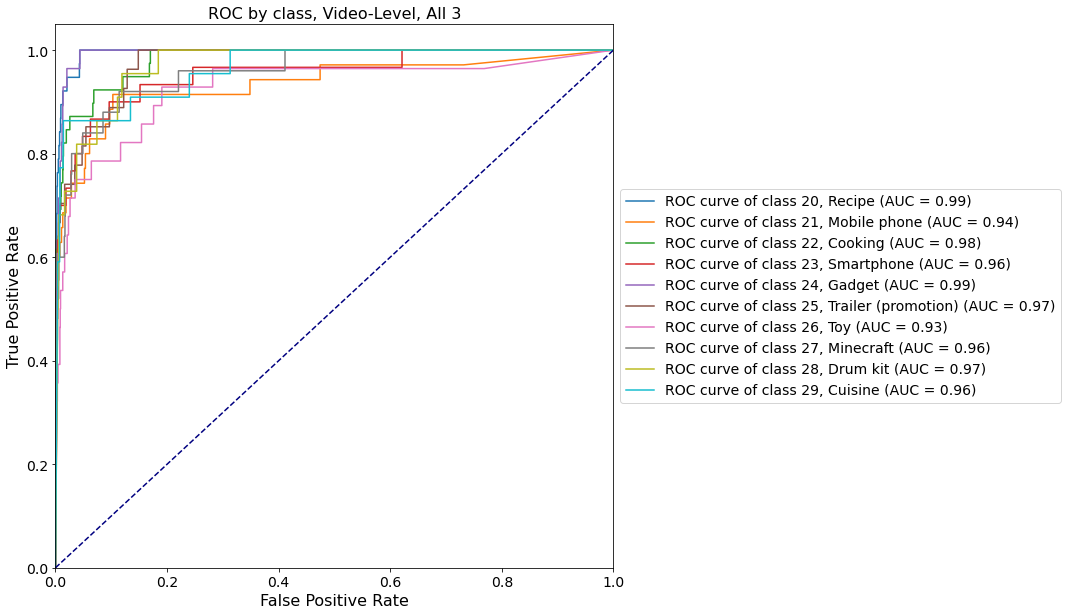

In [475]:
plt.figure(figsize=(10,10))

for i in range(20,30):
    plt.plot(
        fpr_all[i],
        tpr_all[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_all[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Video-Level, All 3")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [476]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision_rgb = dict()
recall_rgb = dict()
average_precision_rgb = dict()
for i in range(n_classes):
    precision_rgb[i], recall_rgb[i], _ = precision_recall_curve(ytest_rgb[:, i], yscore_rgb[:, i])
    average_precision_rgb[i] = average_precision_score(ytest_rgb[:, i], yscore_rgb[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_rgb["micro"], recall_rgb["micro"], _ = precision_recall_curve(
    ytest_rgb.ravel(), yscore_rgb.ravel()
)
average_precision_rgb["micro"] = average_precision_score(ytest_rgb, yscore_rgb, average="micro")




# For each class
precision_aud = dict()
recall_aud = dict()
average_precision_aud = dict()
for i in range(n_classes):
    precision_aud[i], recall_aud[i], _ = precision_recall_curve(ytest_aud[:, i], yscore_aud[:, i])
    average_precision_aud[i] = average_precision_score(ytest_aud[:, i], yscore_aud[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_aud["micro"], recall_aud["micro"], _ = precision_recall_curve(
    ytest_aud.ravel(), yscore_aud.ravel()
)
average_precision_aud["micro"] = average_precision_score(ytest_aud, yscore_aud, average="micro")



# For each class
precision_all = dict()
recall_all = dict()
average_precision_all = dict()
for i in range(n_classes):
    precision_all[i], recall_all[i], _ = precision_recall_curve(ytest_all[:, i], yscore_all[:, i])
    average_precision_all[i] = average_precision_score(ytest_all[:, i], yscore_all[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_all["micro"], recall_all["micro"], _ = precision_recall_curve(
    ytest_all.ravel(), yscore_all.ravel()
)
average_precision_all["micro"] = average_precision_score(ytest_all, yscore_all, average="micro")



Text(0.5, 1.0, 'Video-Level Aggregate Precision-Recall Curves')

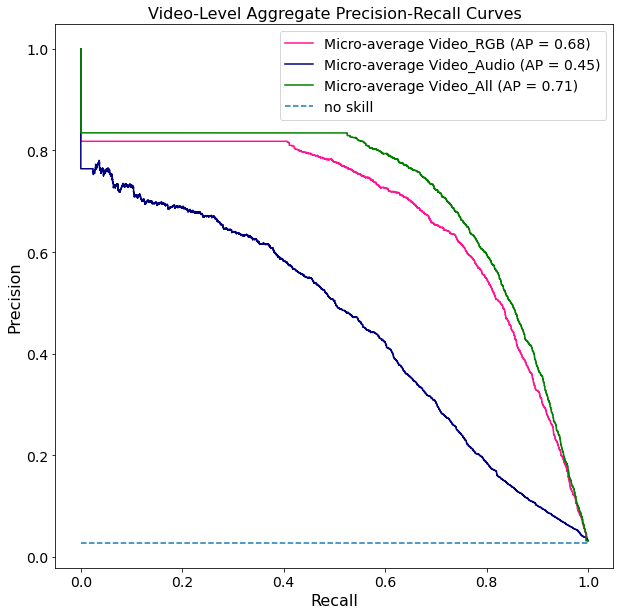

In [477]:
from sklearn.metrics import PrecisionRecallDisplay

_, ax = plt.subplots(figsize=(10, 10))


dis=PrecisionRecallDisplay(
    recall=recall_rgb["micro"],
    precision=precision_rgb["micro"],
    average_precision=average_precision_rgb["micro"],
)
dis.plot(ax=ax, name="Micro-average Video_RGB", color="deeppink")

dis=PrecisionRecallDisplay(
    recall=recall_aud["micro"],
    precision=precision_aud["micro"],
    average_precision=average_precision_aud["micro"],

)
dis.plot(ax=ax, name="Micro-average Video_Audio", color="navy")

dis=PrecisionRecallDisplay(
    recall=recall_all["micro"],
    precision=precision_all["micro"],
    average_precision=average_precision_all["micro"],

)
no_skill = 0.027 # calculated with train data
dis.plot(ax=ax, name="Micro-average Video_All", color="green")
ax.plot([0, 1], [no_skill, no_skill],label="no skill", linestyle="dashed")
ax.legend()

ax.set_title("Video-Level Aggregate Precision-Recall Curves")

In [478]:
ytest_rgb=[]
for i in fme_rgb["y_true"]:
    ytest_rgb.extend(i)
ytest_rgb=np.array(ytest_rgb)


yscore_rgb=[]
for i in fme_rgb["y_predproba"]:
    yscore_rgb.extend(i)
yscore_rgb=np.array(yscore_rgb)

ytest_rgb=ytest_rgb.reshape(fme_rgb.shape[0],n_classes)
yscore_rgb=yscore_rgb.reshape(fme_rgb.shape[0],n_classes)



fpr_rgb = dict()
tpr_rgb = dict()
roc_auc_rgb = dict()
for i in range(n_classes):
    fpr_rgb[i], tpr_rgb[i], _ = roc_curve(ytest_rgb[:, i], yscore_rgb[:, i])
    roc_auc_rgb[i] = auc(fpr_rgb[i], tpr_rgb[i])
# Compute micro-average ROC curve and ROC area
fpr_rgb["micro"], tpr_rgb["micro"], _ = roc_curve(ytest_rgb.ravel(), yscore_rgb.ravel())
roc_auc_rgb["micro"] = auc(fpr_rgb["micro"], tpr_rgb["micro"])


# First aggregate all false positive rates
all_fpr_rgb = np.unique(np.concatenate([fpr_rgb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rgb = np.zeros_like(all_fpr_rgb)
for i in range(n_classes):
    mean_tpr_rgb += np.interp(all_fpr_rgb, fpr_rgb[i], tpr_rgb[i])

# Finally average it and compute AUC
mean_tpr_rgb /= n_classes

fpr_rgb["macro"] = all_fpr_rgb
tpr_rgb["macro"] = mean_tpr_rgb
roc_auc_rgb["macro"] = auc(fpr_rgb["macro"], tpr_rgb["macro"])

In [479]:
ytest_aud=[]
for i in fme_aud["y_true"]:
    ytest_aud.extend(i)
ytest_aud=np.array(ytest_aud)


yscore_aud=[]
for i in fme_aud["y_predproba"]:
    yscore_aud.extend(i)
yscore_aud=np.array(yscore_aud)


ytest_aud=ytest_aud.reshape(fme_aud.shape[0],n_classes)
yscore_aud=yscore_aud.reshape(fme_aud.shape[0],n_classes)




fpr_aud = dict()
tpr_aud = dict()
roc_auc_aud = dict()
for i in range(n_classes):
    fpr_aud[i], tpr_aud[i], _ = roc_curve(ytest_aud[:, i], yscore_aud[:, i])
    roc_auc_aud[i] = auc(fpr_aud[i], tpr_aud[i])
# Compute micro-average ROC curve and ROC area
fpr_aud["micro"], tpr_aud["micro"], _ = roc_curve(ytest_aud.ravel(), yscore_aud.ravel())
roc_auc_aud["micro"] = auc(fpr_aud["micro"], tpr_aud["micro"])


# First aggregate all false positive rates
all_fpr_aud = np.unique(np.concatenate([fpr_aud[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_aud = np.zeros_like(all_fpr_aud)
for i in range(n_classes):
    mean_tpr_aud += np.interp(all_fpr_aud, fpr_aud[i], tpr_aud[i])

# Finally average it and compute AUC
mean_tpr_aud /= n_classes

fpr_aud["macro"] = all_fpr_aud
tpr_aud["macro"] = mean_tpr_aud
roc_auc_aud["macro"] = auc(fpr_aud["macro"], tpr_aud["macro"])

In [480]:
ytest_all=[]
for i in fme_all["y_true"]:
    ytest_all.extend(i)
ytest_all=np.array(ytest_all)


yscore_all=[]
for i in fme_all["y_predproba"]:
    yscore_all.extend(i)
yscore_all=np.array(yscore_all)

ytest_all=ytest_all.reshape(fme_all.shape[0],n_classes)
yscore_all=yscore_all.reshape(fme_all.shape[0],n_classes)



fpr_all = dict()
tpr_all = dict()
roc_auc_all = dict()
for i in range(n_classes):
    fpr_all[i], tpr_all[i], _ = roc_curve(ytest_all[:, i], yscore_all[:, i])
    roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])
# Compute micro-average ROC curve and ROC area
fpr_all["micro"], tpr_all["micro"], _ = roc_curve(ytest_all.ravel(), yscore_all.ravel())
roc_auc_all["micro"] = auc(fpr_all["micro"], tpr_all["micro"])


# First aggregate all false positive rates
all_fpr_all = np.unique(np.concatenate([fpr_all[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_all = np.zeros_like(all_fpr_all)
for i in range(n_classes):
    mean_tpr_all += np.interp(all_fpr_all, fpr_all[i], tpr_all[i])

# Finally average it and compute AUC
mean_tpr_all /= n_classes

fpr_all["macro"] = all_fpr_all
tpr_all["macro"] = mean_tpr_all
roc_auc_all["macro"] = auc(fpr_all["macro"], tpr_all["macro"])

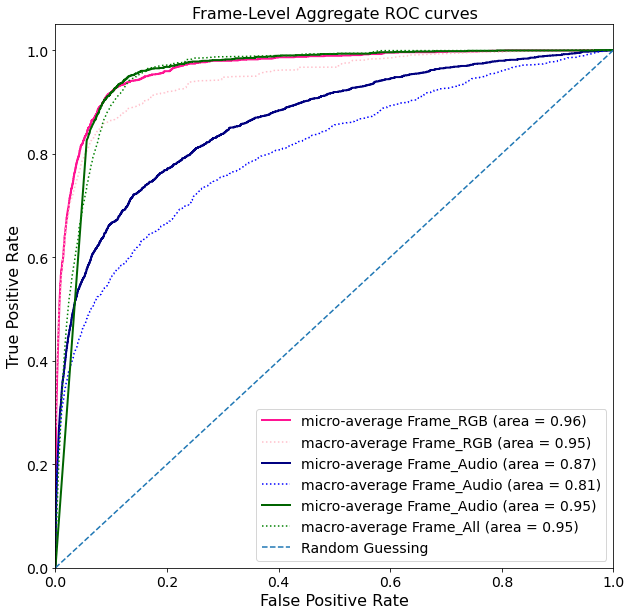

<Figure size 432x288 with 0 Axes>

In [481]:
plt.figure(figsize=(10,10))

plt.plot(
    fpr_rgb["micro"],
    tpr_rgb["micro"],
    label="micro-average Frame_RGB (area = {0:0.2f})".format(roc_auc_rgb["micro"]),
    color="deeppink",
   # linestyle=":",
    linewidth=2

)

plt.plot(
    fpr_rgb["macro"],
    tpr_rgb["macro"],
    label="macro-average Frame_RGB (area = {0:0.2f})".format(roc_auc_rgb["macro"]),
    color="pink",
    linestyle=":",

)

plt.plot(
    fpr_aud["micro"],
    tpr_aud["micro"],
    label="micro-average Frame_Audio (area = {0:0.2f})".format(roc_auc_aud["micro"]),
    color="navy",
    #linestyle="",
    linewidth=2

)

plt.plot(
    fpr_aud["macro"],
    tpr_aud["macro"],
    label="macro-average Frame_Audio (area = {0:0.2f})".format(roc_auc_aud["macro"]),
    color="blue",
    linestyle=":",


)



plt.plot(
    fpr_all["micro"],
    tpr_all["micro"],
    label="micro-average Frame_Audio (area = {0:0.2f})".format(roc_auc_all["micro"]),
    color="darkgreen",
    #linestyle="",
    linewidth=2

)

plt.plot(
    fpr_all["macro"],
    tpr_all["macro"],
    label="macro-average Frame_All (area = {0:0.2f})".format(roc_auc_all["macro"]),
    color="green",
    linestyle=":",
   

)

plt.plot([0, 1], [0, 1],label="Random Guessing",linestyle="dashed")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Frame-Level Aggregate ROC curves")
plt.legend(loc="lower right")
plt.show()
plt.savefig('vid-level.png', dpi=300)

In [482]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision_rgb = dict()
recall_rgb = dict()
average_precision_rgb = dict()
for i in range(n_classes):
    precision_rgb[i], recall_rgb[i], _ = precision_recall_curve(ytest_rgb[:, i], yscore_rgb[:, i])
    average_precision_rgb[i] = average_precision_score(ytest_rgb[:, i], yscore_rgb[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_rgb["micro"], recall_rgb["micro"], _ = precision_recall_curve(
    ytest_rgb.ravel(), yscore_rgb.ravel()
)
average_precision_rgb["micro"] = average_precision_score(ytest_rgb, yscore_rgb, average="micro")




# For each class
precision_aud = dict()
recall_aud = dict()
average_precision_aud = dict()
for i in range(n_classes):
    precision_aud[i], recall_aud[i], _ = precision_recall_curve(ytest_aud[:, i], yscore_aud[:, i])
    average_precision_aud[i] = average_precision_score(ytest_aud[:, i], yscore_aud[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_aud["micro"], recall_aud["micro"], _ = precision_recall_curve(
    ytest_aud.ravel(), yscore_aud.ravel()
)
average_precision_aud["micro"] = average_precision_score(ytest_aud, yscore_aud, average="micro")



# For each class
precision_all = dict()
recall_all = dict()
average_precision_all = dict()
for i in range(n_classes):
    precision_all[i], recall_all[i], _ = precision_recall_curve(ytest_all[:, i], yscore_all[:, i])
    average_precision_all[i] = average_precision_score(ytest_all[:, i], yscore_all[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_all["micro"], recall_all["micro"], _ = precision_recall_curve(
    ytest_all.ravel(), yscore_all.ravel()
)
average_precision_all["micro"] = average_precision_score(ytest_all, yscore_all, average="micro")


Text(0.5, 1.0, 'Frame-Level Aggregate Precision-Recall Curves')

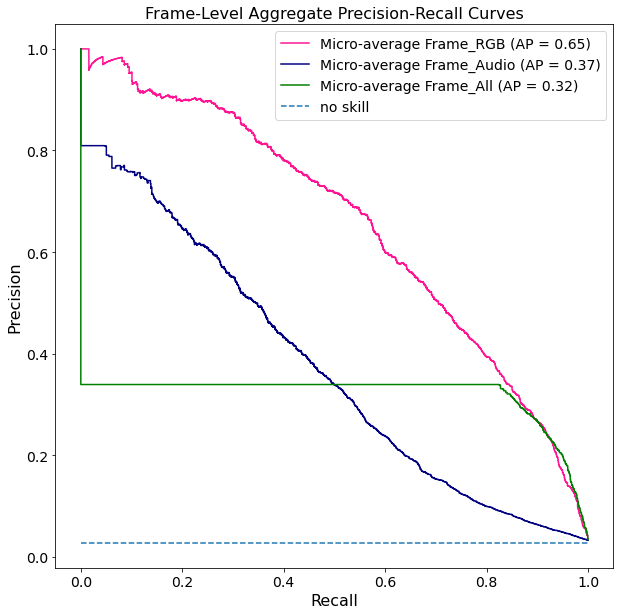

In [483]:
from sklearn.metrics import PrecisionRecallDisplay

_, ax = plt.subplots(figsize=(10, 10))


dis=PrecisionRecallDisplay(
    recall=recall_rgb["micro"],
    precision=precision_rgb["micro"],
    average_precision=average_precision_rgb["micro"],
)
dis.plot(ax=ax, name="Micro-average Frame_RGB", color="deeppink")

dis=PrecisionRecallDisplay(
    recall=recall_aud["micro"],
    precision=precision_aud["micro"],
    average_precision=average_precision_aud["micro"],

)
dis.plot(ax=ax, name="Micro-average Frame_Audio", color="navy")

dis=PrecisionRecallDisplay(
    recall=recall_all["micro"],
    precision=precision_all["micro"],
    average_precision=average_precision_all["micro"],

)
dis.plot(ax=ax, name="Micro-average Frame_All", color="green")

no_skill = 0.027 # calculated with train data
ax.plot([0, 1], [no_skill, no_skill],label="no skill", linestyle="dashed")
ax.legend()

ax.set_title("Frame-Level Aggregate Precision-Recall Curves")

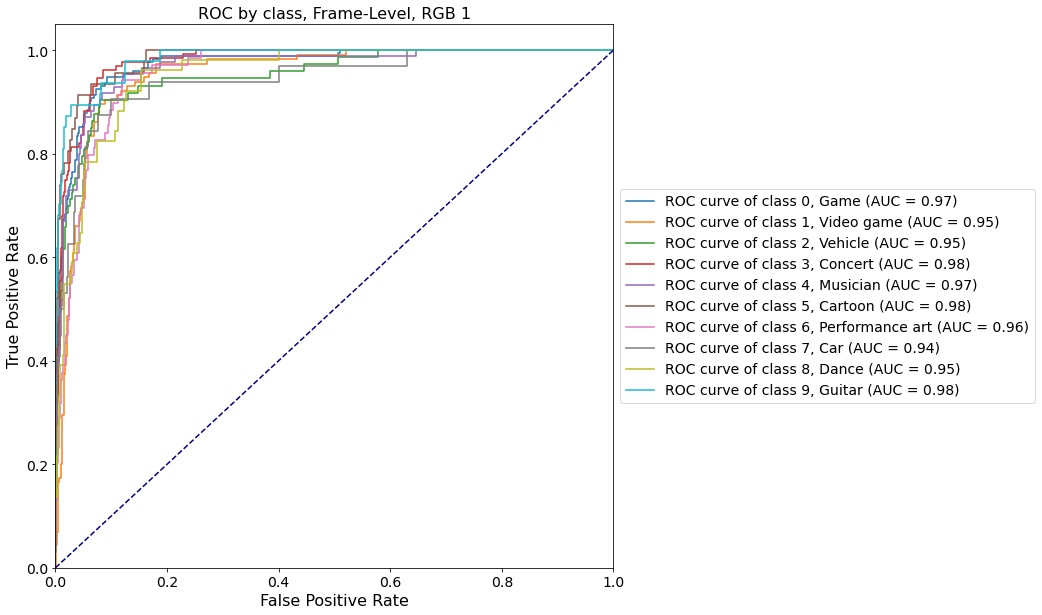

In [484]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_rgb[i],
        tpr_rgb[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_rgb[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Frame-Level, RGB 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

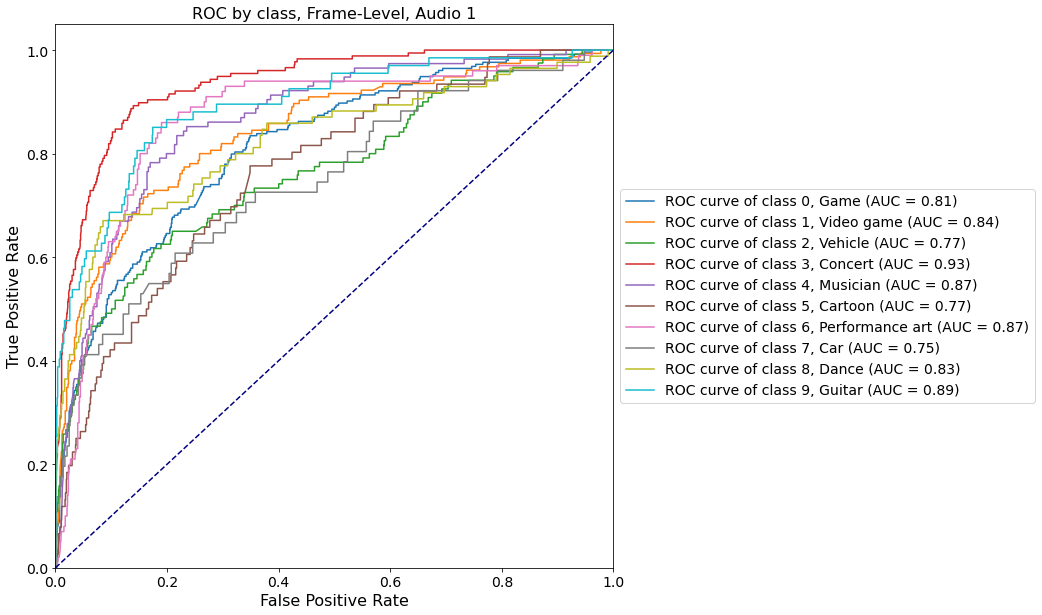

In [485]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_aud[i],
        tpr_aud[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_aud[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Frame-Level, Audio 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

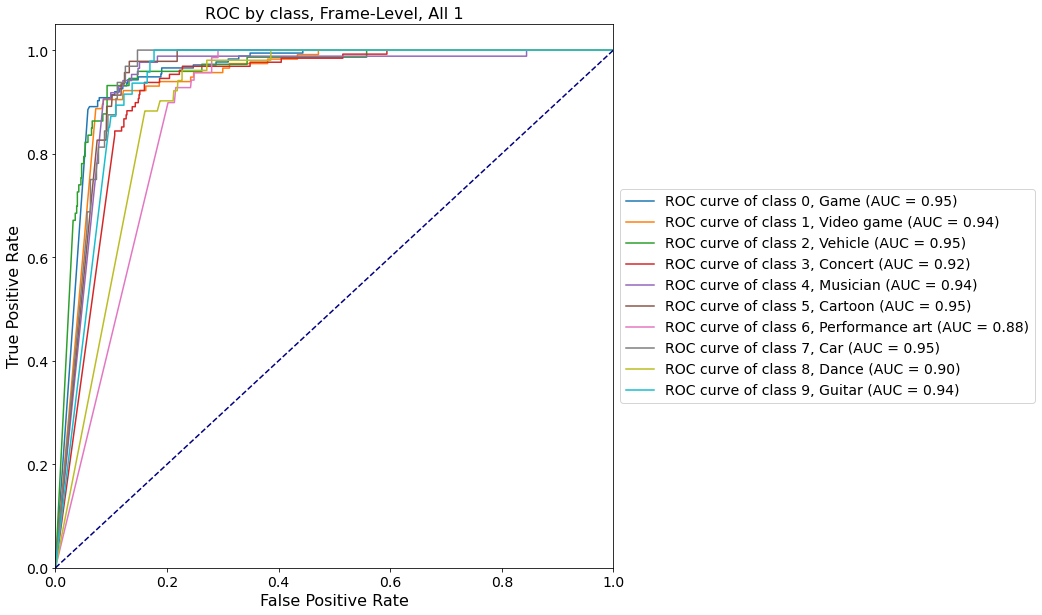

In [486]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.plot(
        fpr_all[i],
        tpr_all[i],
        label="ROC curve of class "+str(i)+", "+ label_dict.Name[i]+" (AUC = {0:0.2f})".format(roc_auc_all[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC by class, Frame-Level, All 1")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()